In [5]:
import pandas as pd
import plotly.express as px
from numpy import log2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

In [17]:
df_s2 = pd.read_csv('./results/captura_S2-model-leo_16:41_23-4-2022.csv', usecols=['simbolo', 'apariciones'])
name = 'leo_s2' 

In [7]:
df_s2

,simbolo,apariciones
0,"('192.168.2.100', '133.100.9.2')",1986.0
1,"('192.168.2.100', '192.36.144.22')",1986.0
2,"('192.168.0.122', '169.254.255.255')",3335.0
3,"('192.168.2.100', '128.138.140.44')",1985.0
4,"('192.168.0.219', '169.254.169.254')",84.0
5,"('192.168.0.1', '192.168.0.220')",137.0
6,"('192.168.0.220', '192.168.0.1')",137.0
7,"('192.168.0.1', '192.168.0.11')",106.0
8,"('192.168.0.1', '192.168.0.177')",106.0
9,"('192.168.0.1', '192.168.0.191')",106.0


In [8]:
# separar tuplas
def extreaer_fuente(simbolo):
    return simbolo.split("'")[1]
def extreaer_destino(simbolo):
    return simbolo.split("'")[3]
def publica_o_privada(simbolo):
    if simbolo.startswith('192.168'):
        return "Privada"
    return "Pública"

df_s2["IP fuente"] = df_s2["simbolo"].apply(extreaer_fuente)
df_s2["IP destino"] = df_s2["simbolo"].apply(extreaer_destino)
df_s2["origen fuente"] = df_s2["IP fuente"].apply(publica_o_privada)
df_s2["origen destino"] = df_s2["IP destino"].apply(publica_o_privada)
df_s2["apariciones"] = df_s2["apariciones"].astype(int)
df_s2.sort_values(by='apariciones', ascending=False, inplace=True)
df_s2 = df_s2[['IP fuente', 'origen fuente', 'IP destino', 'origen destino', 'apariciones', 'simbolo']]
df_s2

,IP fuente,origen fuente,IP destino,origen destino,apariciones,simbolo
2,192.168.0.122,Privada,169.254.255.255,Pública,3335,"('192.168.0.122', '169.254.255.255')"
0,192.168.2.100,Privada,133.100.9.2,Pública,1986,"('192.168.2.100', '133.100.9.2')"
1,192.168.2.100,Privada,192.36.144.22,Pública,1986,"('192.168.2.100', '192.36.144.22')"
3,192.168.2.100,Privada,128.138.140.44,Pública,1985,"('192.168.2.100', '128.138.140.44')"
5,192.168.0.1,Privada,192.168.0.220,Privada,137,"('192.168.0.1', '192.168.0.220')"
6,192.168.0.220,Privada,192.168.0.1,Privada,137,"('192.168.0.220', '192.168.0.1')"
7,192.168.0.1,Privada,192.168.0.11,Privada,106,"('192.168.0.1', '192.168.0.11')"
8,192.168.0.1,Privada,192.168.0.177,Privada,106,"('192.168.0.1', '192.168.0.177')"
9,192.168.0.1,Privada,192.168.0.191,Privada,106,"('192.168.0.1', '192.168.0.191')"
4,192.168.0.219,Privada,169.254.169.254,Pública,84,"('192.168.0.219', '169.254.169.254')"


AttributeError: 'DataFrame' object has no attribute 'name'

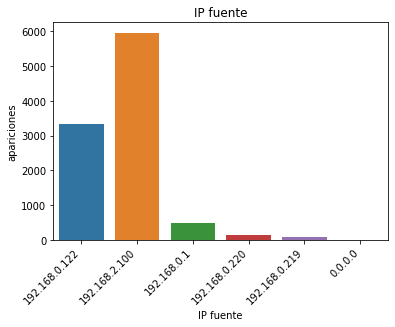

In [16]:
def graficarProporcionBroadvsUnicast(df):
    ax = sns.barplot(
        x= df['IP fuente'], 
        y= df['apariciones'],
        estimator=sum,
        ci=None,
    ).set_title("IP fuente")
    plt.xticks(rotation=45, ha='right')
    fig = ax.get_figure()
    fig.savefig(f"./graphs/sourceip_{name}")
graficarProporcionBroadvsUnicast(df_s2)

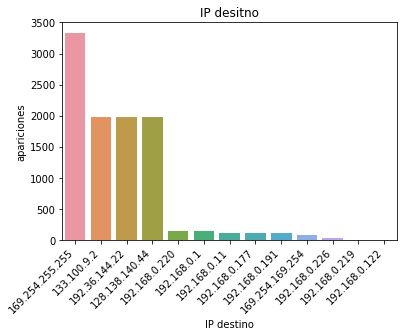

In [10]:
def graficarProporcionBroadvsUnicast(df):
    ax = sns.barplot(
        x= df['IP destino'], 
        y= df['apariciones'],
        estimator=sum,
        ci=None,
    ).set_title("IP desitno")
    plt.xticks(rotation=45, ha='right')
    fig = ax.get_figure()
    #fig.savefig(f"./graphs/broadVuni_{name}")
graficarProporcionBroadvsUnicast(df_s2)

In [11]:
def pieOrigenFuente(df):
    fig = px.pie(df, values='apariciones', names='origen fuente', height= 500,
    width= 500,
    color_discrete_sequence=px.colors.qualitative.Plotly[:2][::-1],
    title="Origen de IP fuente")
    fig.update_traces(textfont_size=16)
    fig.show()    
pieOrigenFuente(df_s2)

In [12]:
def pieOrigenDestino(df):
    fig = px.pie(df, values='apariciones', names='origen destino', height= 500,
    width= 500,
    color_discrete_sequence=px.colors.qualitative.Plotly,
    title="Origen de IP destino")
    fig.update_traces(textfont_size=16)
    fig.show()
pieOrigenDestino(df_s2)

In [13]:
df_s2

,IP fuente,origen fuente,IP destino,origen destino,apariciones,simbolo
2,192.168.0.122,Privada,169.254.255.255,Pública,3335,"('192.168.0.122', '169.254.255.255')"
0,192.168.2.100,Privada,133.100.9.2,Pública,1986,"('192.168.2.100', '133.100.9.2')"
1,192.168.2.100,Privada,192.36.144.22,Pública,1986,"('192.168.2.100', '192.36.144.22')"
3,192.168.2.100,Privada,128.138.140.44,Pública,1985,"('192.168.2.100', '128.138.140.44')"
5,192.168.0.1,Privada,192.168.0.220,Privada,137,"('192.168.0.1', '192.168.0.220')"
6,192.168.0.220,Privada,192.168.0.1,Privada,137,"('192.168.0.220', '192.168.0.1')"
7,192.168.0.1,Privada,192.168.0.11,Privada,106,"('192.168.0.1', '192.168.0.11')"
8,192.168.0.1,Privada,192.168.0.177,Privada,106,"('192.168.0.1', '192.168.0.177')"
9,192.168.0.1,Privada,192.168.0.191,Privada,106,"('192.168.0.1', '192.168.0.191')"
4,192.168.0.219,Privada,169.254.169.254,Pública,84,"('192.168.0.219', '169.254.169.254')"


In [14]:
df_s2['probabilidad'] = df_s2["apariciones"]/df_s2["apariciones"].sum()
df_s2['información'] = -log2(df_s2['probabilidad'])
entropia = (df_s2['probabilidad'] * df_s2['información']).sum()
print(f"La entroía de la fuente en la captura {name} es: {entropia}")

La entroía de la fuente en la captura leo-s2 es: 2.3844595543146485


/tmp/ipykernel_5730/121174352.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5730/121174352.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
def informacionPorSimbolo(df):

    fig = px.bar(df,
        y= 'simbolo', 
        x= 'información',
        labels={
                "simbolo": "Símbolo de la fuente",
                "información": "Información por símbolo",
                        },
        height= 600,
        width= 850,
        text_auto=True,
        orientation='h')
    entropia_maxima = log2(len(df))
    fig.add_vline(x=entropia,  line_dash="dot",
    line_color="yellow",
    annotation_text="Entropía",
    annotation=dict(
        x=2.4,
        y=0.1,
        font_size=15),)
    fig.add_vline(x=entropia_maxima,
    line_dash="dot",
    line_color="red",
    annotation_text="Entropía máxima",
    annotation=dict(
        x=4,
        y=0.05,
        font_size=15),)
    fig.show()
informacionPorSimbolo(df_s2)